In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA


In [55]:
# shape of data
df.shape

(1338, 7)

In [56]:
df.size

9366

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Visualization

In [59]:
numeric_cols = ['age', 'bmi', 'charges']

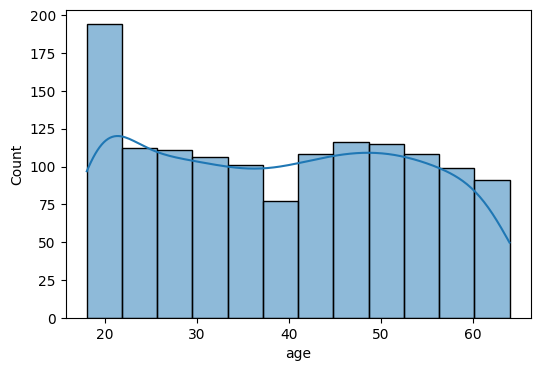

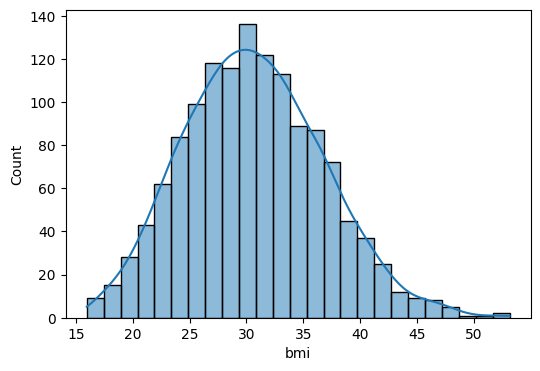

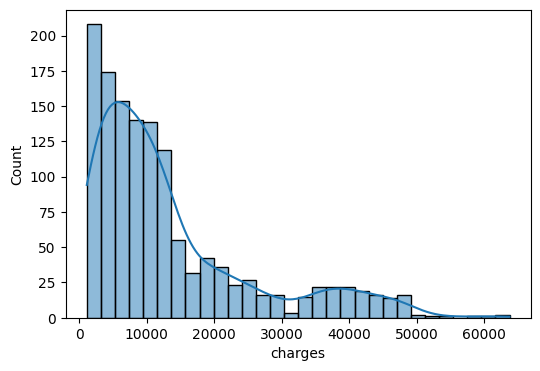

In [60]:
for col in numeric_cols:
    plt.figure(figsize = (6,4))
    sns.histplot(x = df[col], kde = True)

In [61]:
categorical_cols = ['sex', 'smoker', 'children', 'region']

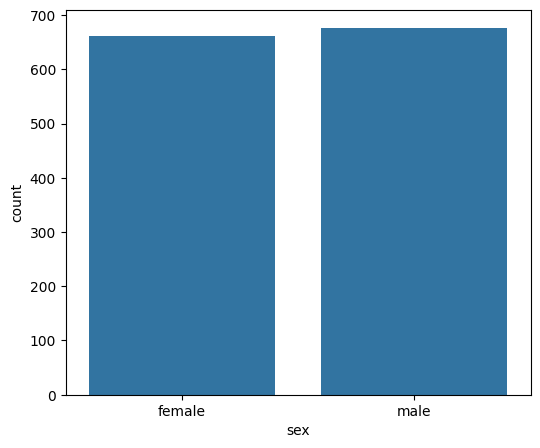

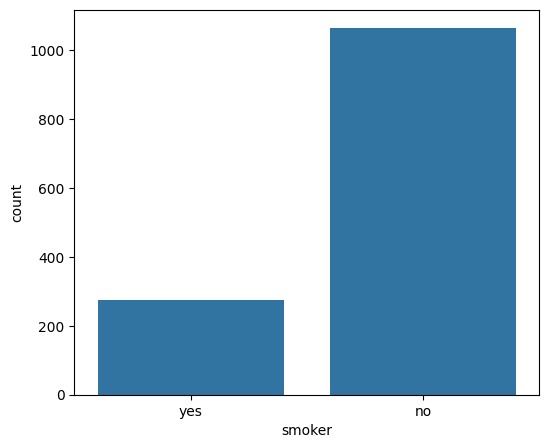

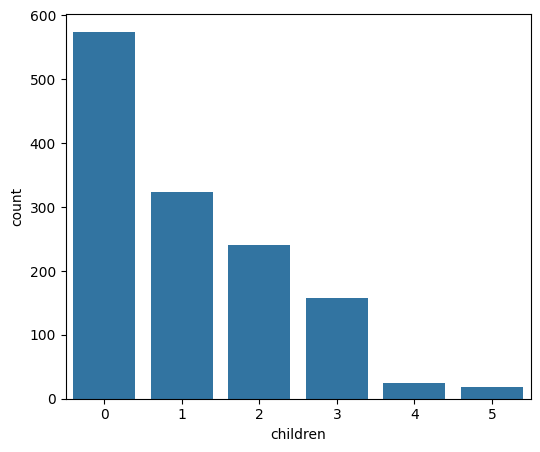

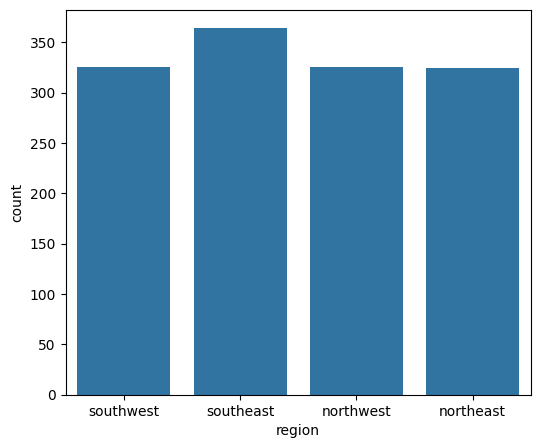

In [62]:
for col in categorical_cols:
    plt.figure(figsize = (6,5))
    sns.countplot(x = df[col])

<Axes: >

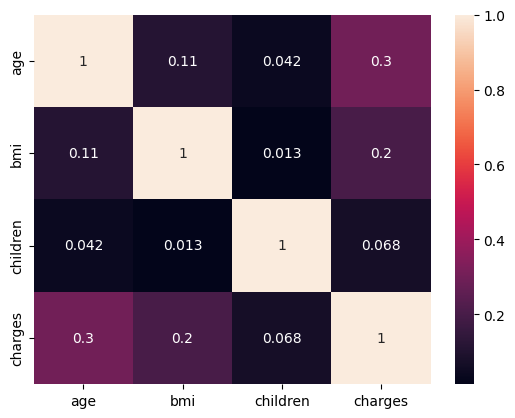

In [63]:
# correlation
sns.heatmap(df.corr(numeric_only = True), annot = True)

# Data Cleaning and preprocess

In [64]:
df_cleaned = df.copy()

In [65]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [66]:
# handle missing values
df_cleaned.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [67]:
# inconsistency
df_cleaned['sex'].value_counts()

,count
sex,
male,676
female,662


In [68]:
df_cleaned['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [69]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [70]:
# encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_cleaned['sex'] = encoder.fit_transform(df['sex'])
df_cleaned['smoker'] = encoder.fit_transform(df['smoker'])
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [71]:
# One Hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns = ['region'], drop_first = True)

In [72]:
df_cleaned = df_cleaned.astype(int)

In [73]:
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0


# Feature eng and extraction

In [74]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['age', 'bmi', 'children']

In [75]:
df_cleaned[cols] = scaler.fit_transform(df[cols])
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,16884,0,0,1
1,-1.509965,1,0.509621,-0.078767,0,1725,0,1,0
2,-0.797954,1,0.383307,1.580926,0,4449,0,1,0
3,-0.441948,1,-1.305531,-0.908614,0,21984,1,0,0
4,-0.513149,1,-0.292556,-0.908614,0,3866,1,0,0


In [76]:
# relationship
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func = f_regression, k = 'all')
X = df_cleaned.drop(columns = ['charges'], axis = 1)
y = df_cleaned['charges']
selector.fit(X, y)
scores = pd.Series(selector.scores_, index = X.columns)
scores.sort_values(ascending = False)

,0
smoker,2177.605938
age,131.174489
bmi,54.709648
region_southeast,7.352385
children,6.206201
sex,4.399903
region_southwest,2.499075
region_northwest,2.130893


In [77]:
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,16884,0,0,1
1,-1.509965,1,0.509621,-0.078767,0,1725,0,1,0
2,-0.797954,1,0.383307,1.580926,0,4449,0,1,0
3,-0.441948,1,-1.305531,-0.908614,0,21984,1,0,0
4,-0.513149,1,-0.292556,-0.908614,0,3866,1,0,0


In [80]:
final_df = df_cleaned[['age', 'sex', 'bmi', 'charges', 'children', 'smoker', 'region_southeast']]
final_df.head()

,age,sex,bmi,charges,children,smoker,region_southeast
0,-1.438764,0,-0.453320,16884,-0.908614,1,0
1,-1.509965,1,0.509621,1725,-0.078767,0,1
2,-0.797954,1,0.383307,4449,1.580926,0,1
3,-0.441948,1,-1.305531,21984,-0.908614,0,0
4,-0.513149,1,-0.292556,3866,-0.908614,0,0


# Split dataset

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
X = final_df.drop(columns = ['charges'], axis = 1)
y = df['charges']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Build model

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [90]:
y_pred = model.predict(X_test)

In [91]:
y_pred

array([ 8591.37171958,  7039.28842866, 36854.93907902,  9451.30200151,
       26962.19039525, 11217.57731063,   181.89372065, 16835.70544144,
         757.20861749, 11199.68713533, 28564.58178679,  9351.48744281,
        5274.82449975, 38384.70550787, 40228.38215417, 37083.58910175,
       15182.7231927 , 35902.48876911,  9128.04371954, 31463.23901729,
        4297.36641331, 10532.57723973,  2789.37731778,  6694.77828825,
       11278.53034165, 12544.22896314, 14888.48525134,  6130.60646913,
        9578.16160929,  2196.58409741,  9528.25354638, 13030.49504166,
        4549.24649326,  3430.021933  ,  4879.03427856, 12588.56015133,
        2411.01787465,  9221.94363562, 33284.20954435, 32591.89615592,
        4329.33611347,  4300.42819184, 14519.26862312, 11418.52742537,
        8761.64120531, 12521.36432039,  5237.64368994,  3591.07800479,
       35495.43117537,  9124.98656818, 15807.60194544,  2366.11716469,
       12277.9143268 ,  1112.74575857, 13377.85971905, 12167.06366282,
      

# Model Evaluation

In [95]:
from sklearn.metrics import r2_score

In [96]:
r2 = r2_score(y_test, y_pred)

In [98]:
# adjusted r2
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-((1 - r2)*(n-1)/(n-p-1))

In [99]:
print(f'R2 score: {r2}')
print(f'Adjusted R2 score: {adjusted_r2}')

R2 score: 0.7821770106209518
Adjusted R2 score: 0.7771695855777553
